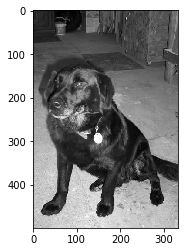

In [1]:
import numpy as np #for matrix operations
import matplotlib.pyplot as plt #to show our images 
import os #to open files in our system 
import cv2 #for image manipulation and formatting

DATADIR = "./cats_and_dogs/PetImages"
categories = ["Dog","Cat"]

for category in categories: 
    path = os.path.join(DATADIR,category) #create the path to the "cat" images or "dog" images
    for img in os.listdir(path): #loop through all the cats or dogs
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) #use opencv to read the image into the program 
        #colour images are 3x the size of grayscale, so here we are optimising because we dont think colour adds any valuable information
        plt.imshow(img_array, cmap='gray') #show the image using matplotlib 
        plt.show()
        break
    break


In [2]:
print(img_array) #this is how the image is seen by the computer, a bunch of numbers for the colours of pixels

[[ 41  42  43 ... 123 138 135]
 [ 39  40  41 ... 133 143 136]
 [ 40  41  41 ... 139 145 135]
 ...
 [207 194 213 ... 207 198 188]
 [203 190 212 ... 202 191 184]
 [172 168 204 ... 195 182 179]]


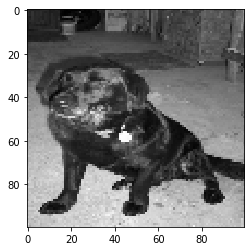

In [3]:
IMG_SIZE = 100 #we want all the images to be 100x100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resize the image using opencv 
plt.imshow(new_array, cmap='gray') #map it to a gray image
plt.show() #show the image using matplotlib

In [4]:
training_data = [] #this list is pairs like this [data, label]

def create_training_data():
    for label, category in enumerate(categories): 
        path = os.path.join(DATADIR,category) #create the path to the "cat" images or "dog" images
        for img in os.listdir(path): #loop through all the cats or dogs
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) #use opencv to read the image into the program 
                #colour images are 3x the size of grayscale, so here we are optimising because we dont think colour adds any valuable information
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #resize the image using opencv
                training_data.append([new_array,label]) # 0 --> Dog , 1 --> Cat
            except Exception as e:
                pass 

create_training_data()
print(len(training_data))
    

24946


Imbalanced datasets
---
Now we have the training data, quick note on imbalanced datasets

Imagine we have a binary dataset with 75% dogs and 25% cats, our neural network will learn to classify dogs more often because there is more of them. However to counteract this problem, we need to let the neural network know so it can weight the cost function slightly differently for each category. Another approach is to balance the dataset by either creating more training examples or reducing the amount of another. 

In [5]:
#lets shuffle the dataset so the neural network doesnt find a pattern in the dataset. 
import random 
random.shuffle(training_data)


In [6]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
1
0
0
0
0


In [7]:
X = [] #X is feature set 
y = [] #y is the label set 

for feature,label in training_data:
    X.append(feature)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [8]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

#pickling allows us to store the data in a serialised form so that when we need it, we can just read it in with ease